In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

## Load each country’s cleaned CSV (data/benin_clean.csv, etc.) locally.

In [ ]:
# Load dataframes
benin_df = pd.read_csv("../data/benin-malanville_qc_clean.csv")
sierraleone_df = pd.read_csv("../data/sierraleone-bumbuna_qc_clean.csv")
togo_df = pd.read_csv("../data/togo_dapaong_clean.csv")

# Set country, to be used as xlabel
benin_df['country'] = 'Benin'
sierraleone_df['country'] = 'Sierra Leone'
togo_df['country'] = 'Togo'

df = pd.concat([benin_df, sierraleone_df, togo_df])
# Data Visualization 
df.info()

## Metric Comparison

In [ ]:
# Set the figure size
plt.figure(figsize=(18, 6))

# Create a boxplot for GHI
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.boxplot(x='country', y='GHI', data=df, palette='Set2')
plt.title("GHI by Country")
plt.xticks(rotation=45)

# Create a boxplot for DNI
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(x='country', y='DNI', data=df, palette='Set2')
plt.title("DNI by Country")
plt.xticks(rotation=45)

# Create a boxplot for DHI
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.boxplot(x='country', y='DHI', data=df, palette='Set2')
plt.title("DHI by Country")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
summary_stats = df.groupby('country').agg(
    GHI_mean=('GHI', 'mean'),
    GHI_median=('GHI', 'median'),
    GHI_std=('GHI', 'std'),
    DNI_mean=('DNI', 'mean'),
    DNI_median=('DNI', 'median'),
    DNI_std=('DNI', 'std'),
    DHI_mean=('DHI', 'mean'),
    DHI_median=('DHI', 'median'),
    DHI_std=('DHI', 'std')
).reset_index()
# Print the summary table
print(summary_stats)

## Statistical Testing (optional but recommended)

In [19]:
f_statistic, p_value = f_oneway(benin_df["GHI"],sierraleone_df["GHI"],togo_df["GHI"])
f_statistic, p_value

(np.float64(4345.094298102169), np.float64(0.0))

## Key Observations

- **Benin** shows the highest average GHI, indicating it receives the most solar radiation on average compared to other countries.
- **Togo** has a significant median GHI, but also exhibits greater variability, suggesting fluctuations in solar radiation levels.
- **Sierraleone** ranks lower in average GHI but maintains a consistent level of solar radiation, as indicated by its lower standard deviation.

## (Bonus) Visual Summary

/tmp/ipykernel_6696/2722576197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GHI', y='country', data=ghi_means, palette='viridis')


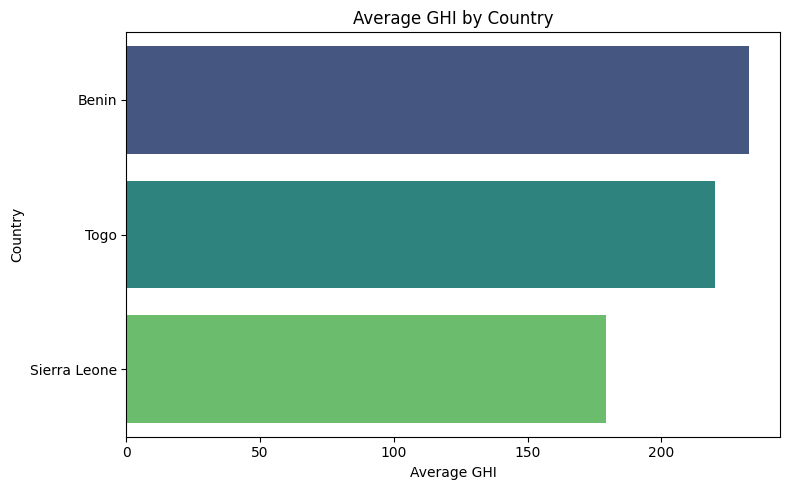

In [20]:
# Calculate mean GHI per country
ghi_means = df.groupby('country')['GHI'].mean().sort_values(ascending=False).reset_index()
# Set figure size
plt.figure(figsize=(8, 5))
# Create barplot
sns.barplot(x='GHI', y='country', data=ghi_means, palette='viridis')
# Set title and labels
plt.title('Average GHI by Country')
plt.xlabel('Average GHI')
plt.ylabel('Country')
# Show plot
plt.tight_layout()
plt.show()